# Import

In [229]:
# gym is a toolkit for making reinforcement learning easier
import gym
from sklearn.neural_network import MLPClassifier
import numpy as np
import joblib

# Create the environment

In [5]:
# Choose the environment, track racing, robot walking....
env = gym.make('CarRacing-v0')

# Simulate, learn

* Your code here to replace the section in red and 4 lines below

In [ ]:
class Q_Learning:
    
    def __init__(self, statedim=512, actiondim=21, lr=0.1, gamma=0.8):
        self.s = statedim
        self.a = actiondim
        self.lr = lr
        self.gamma = gamma
        self.Q = np.zeros((self.s, self.a))
        self.Q[:, 5:15] = 0.2
        self.best_reward = -1000000
        
    def learn(self, action, prev_obs, new_obs, reward):
        """Updates the correct action after receiving the reward."""        
        self.Q[prev_obs, action] = (1 - self.lr) * self.Q[prev_obs, action] + \
        self.lr * (reward + self.gamma * np.max(self.Q[new_obs, :]))
        return None
    
    def best_action(self, prev_obs):
        """Returns index of the highest scoring action from Q-matrix."""
        best_action = np.argmax(self.Q[prev_obs, :])
        return best_action

In [231]:
model = Q_Learning(512, 15, 0.1, 0.8)
joblib.dump(model, "model.joblib")

['model.joblib']

In [232]:
actions = {
    0: [-.9,  0, 0],
    1: [-.45, 0, 0],
    2: [0,    0, 0],
    3: [.45,  0, 0],
    4: [.9,   0, 0],
    5: [-.9, .6,.1],
    6: [-.45,.6,.1],
    7: [0,   .6,.1],
    8: [.45, .6,.1],
    9: [.9,  .6,.1],
    10:[-.9, .9,.1],
    11:[-.45,.9,.1],
    12:[0,   .9,.1],
    13:[.45, .9,.1],
    14:[.9,  .9,.1]
}

In [233]:
def to_num(obs):
    rav = obs.ravel()
    res = 0
    for i in range(len(rav)):
        res = res + rav[i] * 2**i
    return res

def discrete(elem):
    res = [0]
    am = np.argmax(elem)
    if am < 1:
        res[0] = 1
    return res

def binarize(obs):
    # Binarize
    res = ds = np.array(
        list(
            map(discrete, obs.reshape(96 * 96, 3))
        )
    ).reshape(96, 96, 1)
    
    res = res[15:-15, 15:-15, :]
    
    # Downsample
    acc = res[0::22, 0::22, 0]
    for i in range(1,22):
        for j in range(1,22):
            acc += res[i::22, j::22, 0]
    
    acc = (acc / (22 * 22)) > 0.3
    
    return np.array(acc, dtype=int)

In [ ]:
total_reward = 0
obss = []
model = joblib.load("model.joblib")

# Outer loop is for multiple simulations/Episodes (increase for learning over a long time)
for i in range(10):
    env.reset() # Reset to start a new simulation
    
    # Inner loop for simulating the environment:
    # 1. Observe 2. Take action 3. Read reward 4. Learn 1. Observe ...
    for i in range(1000):
        env.render() # For seeing the simulation step
        
        """--------------------------------------------"""
        """YOUR ALGORITHM GOES HERE.
        YOU CAN IMPORT YOUR CODE OR WRITE IT HERE DIRECTLY
        HERE IS AN EXAMPLE"""
        
        prev_obs = observation
        prev_obs_num = to_num(binarize(prev_obs))
        
        if np.random.random() > .2:
            action = model.best_action(prev_obs_num)
            observation, reward, done, info = env.step(actions[action])
        else:
            action = np.random.randint(0, 19)
            observation, reward, done, info = env.step(actions[action])
        
        obs_num = to_num(binarize(observation))
        
        model.learn(action, prev_obs_num, obs_num, reward)
        
        """--------------------------------------------"""
        obss.append(observation)
        # Pring the observations, rewards, whether the round has ended
        print("Observation: ", observation.shape,
              "Reward: ", reward,
              "Done?: ", done,
              "info: ", info)
        
        if i < 1000: # Calculate reward for only first 2000 episodes
            total_reward += reward
        
        if done: # Car steered off stop the simulation and restart it
            break
        
    if total_reward > model.best_reward:
        model.best_reward = total_reward
    joblib.dump(model, "model.joblib")

Track generation: 1237..1550 -> 313-tiles track
Observation:  (96, 96, 3) Reward:  6.310256410256411 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999987 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  3.576470588235294 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  2.995975232198141 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  2.995975

Observation:  (96, 96, 3) Reward:  2.995975232198141 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999432 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  3.0055900621118017 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.0999

Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000009 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999998 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09999999999999964 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.09

Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10000000000000142 Done?:  False info:  {}
Observation:  (96, 96, 3) Reward:  -0.10

In [13]:
print(total_reward)

-68.37943925233684


# Close

In [26]:
# Drop the resources for the environment
env.env.close()

# General Advice

* You can ask the hackathon hero for help, but not too much :)
* Please don't to cheat too much :)
* Please fork don’t clone on the day
* Organise your collaboration and learn about the subject at the start 
* Maybe start simple (even without machine learning) and then employ machine learning
* Check the car racing env page on AI gym to remember the reward and observation structure https://gym.openai.com/envs/CarRacing-v0/

# The Observation

* Here we plot the observation to hint to its content

In [43]:
import numpy as np

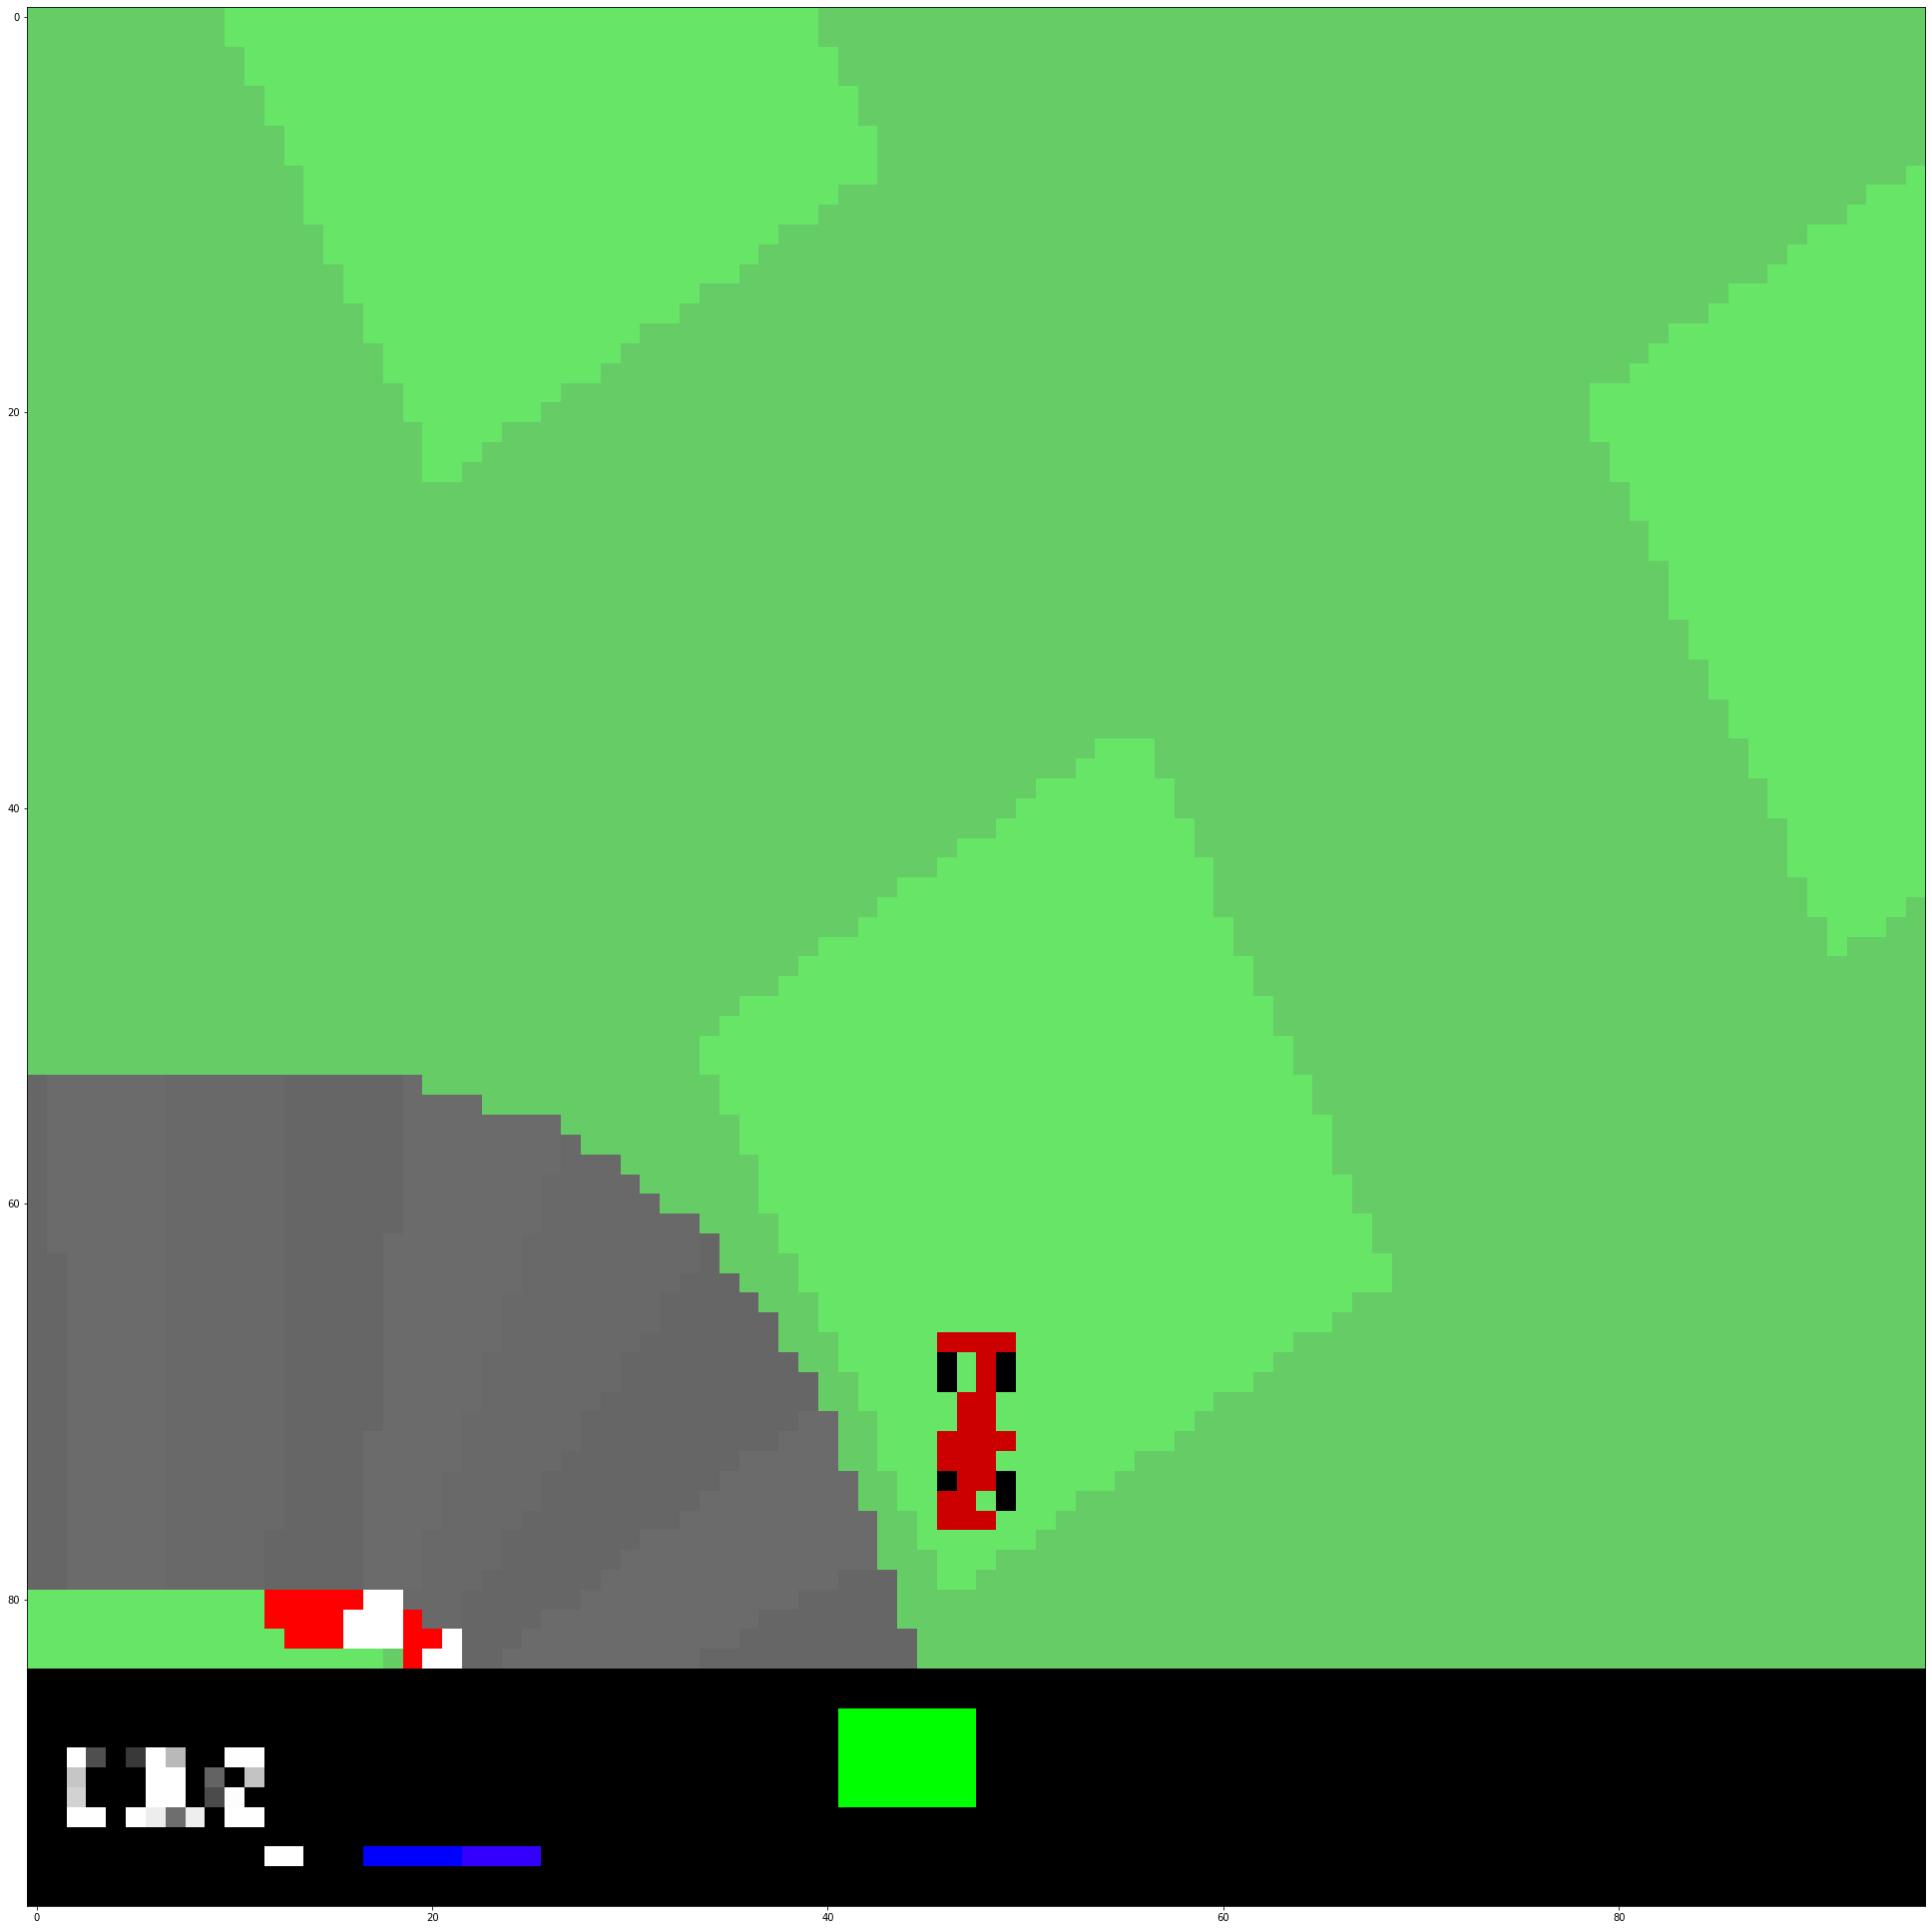

In [186]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35, 35))
plt.imshow(obss[599], interpolation='nearest')
plt.show()

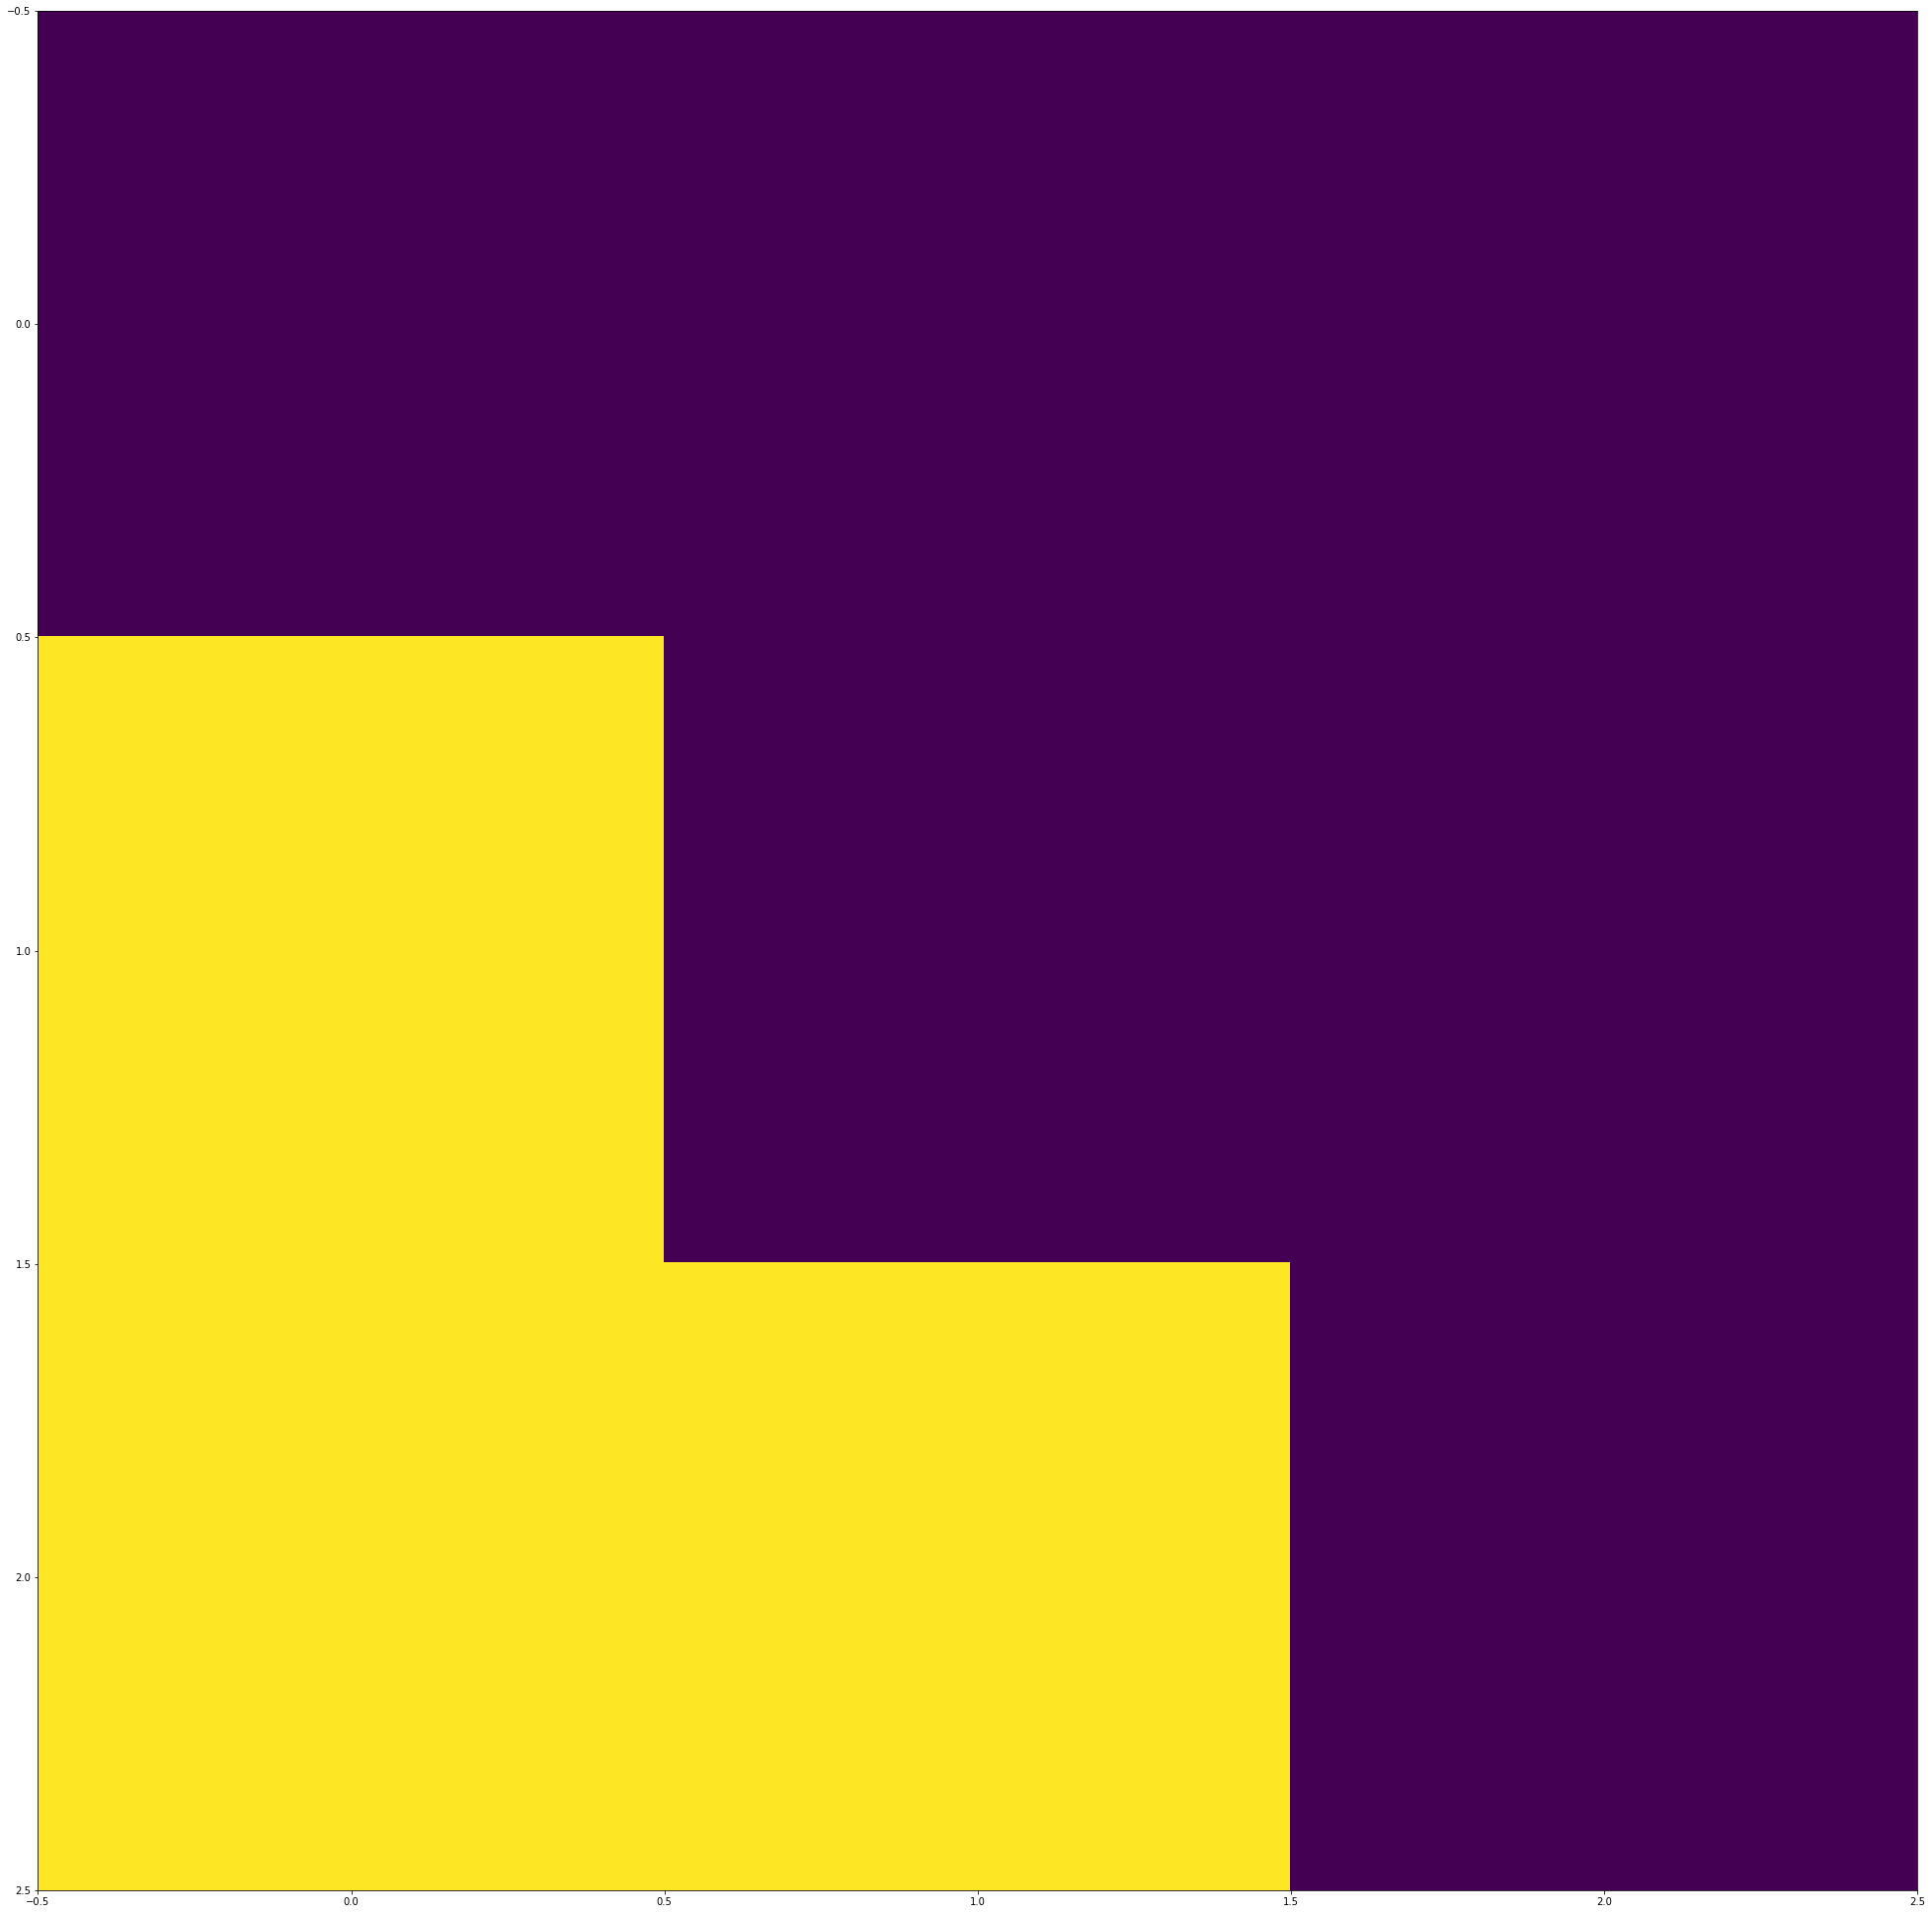

In [188]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35, 35))
plt.imshow(binarize(obss[499]), interpolation='nearest')
plt.show()

In [189]:
train_x = []
train_y = []

In [ ]:
class ML_Q_Learning():
    def __init__(self, num_actions, num_states, lr=0.1, gamma=0.5)
        self.model = MLPClassifier()
        self.gamma = gamma
        self.train_X = []
        self.train_y = []
        
    def best_action(self, state):
        max = -10000000
        action = -1
        for action in actions:
            
        
        